# MNIST Neural Network

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
mnist = tf.keras.datasets.mnist
mnist = mnist.load_data()
(x_train,y_train),(x_test,y_test)=mnist
x_train,x_test = tf.keras.utils.normalize(x_train,axis=1),tf.keras.utils.normalize(x_test,axis=1)

#feed forward NN

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200,activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(100,activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(60,activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

optim = tf.keras.optimizers.Adam(learning_rate=0.01)

#could try sparse
model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#steps_per_epoch = len(x_train)//128

2022-07-13 12:31:04.987554: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# lr schedule callback
lr_decay_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * math.pow(0.6,epoch), verbose=True)


In [4]:
#tf.keras.models.Sequential().fit()
model.fit(x_train,y_train,epochs=10,callbacks=[lr_decay_callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4796 - accuracy: 0.8748 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.006.
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2821 - accuracy: 0.9304 - lr: 0.0060

Epoch 3: LearningRateScheduler setting learning rate to 0.0036.
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2000 - accuracy: 0.9488 - lr: 0.0036

Epoch 4: LearningRateScheduler setting learning rate to 0.0021599999999999996.
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1555 - accuracy: 0.9596 - lr: 0.0022

Epoch 5: LearningRateScheduler setting learning rate to 0.001296.
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1318 - accuracy: 0.9651 - lr: 0.0013

Epoch 6: LearningRateScheduler setting learning rate to 0.0007775999999999998.
Epoch 

In [93]:
# print model layers
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_87 (Dense)            (None, 200)               157000    
                                                                 
 dropout_48 (Dropout)        (None, 200)               0         
                                                                 
 dense_88 (Dense)            (None, 100)               20100     
                                                                 
 dropout_49 (Dropout)        (None, 100)               0         
                                                                 
 dense_89 (Dense)            (None, 60)                6060      
                                                                 
 dropout_50 (Dropout)        (None, 60)              

In [5]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1060 - accuracy: 0.9737
0.10604212433099747 0.9736999869346619


In [6]:
model.save('num_model')

INFO:tensorflow:Assets written to: num_model/assets


In [7]:
new_model = tf.keras.models.load_model('num_model')

In [8]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [14]:
print(len(x_test))

10000


9


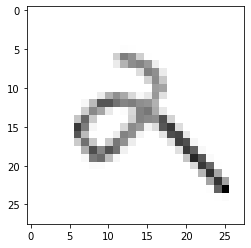

In [23]:
for i in range(len(predictions)):
    if np.argmax(predictions[i])!=y_test[i]:
        print(np.argmax(predictions[i]))
        plt.imshow(x_test[i],cmap=plt.cm.binary)
        break

In [15]:
print(np.argmax(predictions[4567]))

4


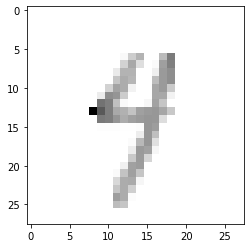

In [16]:
plt.imshow(x_test[4567],cmap=plt.cm.binary)